In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
cars = pd.read_csv("C:\\Users\\shrey\\Downloads\\Assignment\\Multi Linear Regression\\ToyotaCorolla.csv")
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
#check for missing values
cars.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [5]:
cars1=cars.iloc[:,[2,3,6,8,12,13,15,16,17]]
cars1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [12]:
cars1.rename(columns={"Age_08_04":"Age","cc":"CC"},inplace=True)
cars1

C:\Users\shrey\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [13]:
cars1[cars1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [14]:
cars2=cars1.drop_duplicates().reset_index(drop=True)
cars2

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [15]:
cars2.describe()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# Correlation Matrix

In [16]:
cars2.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


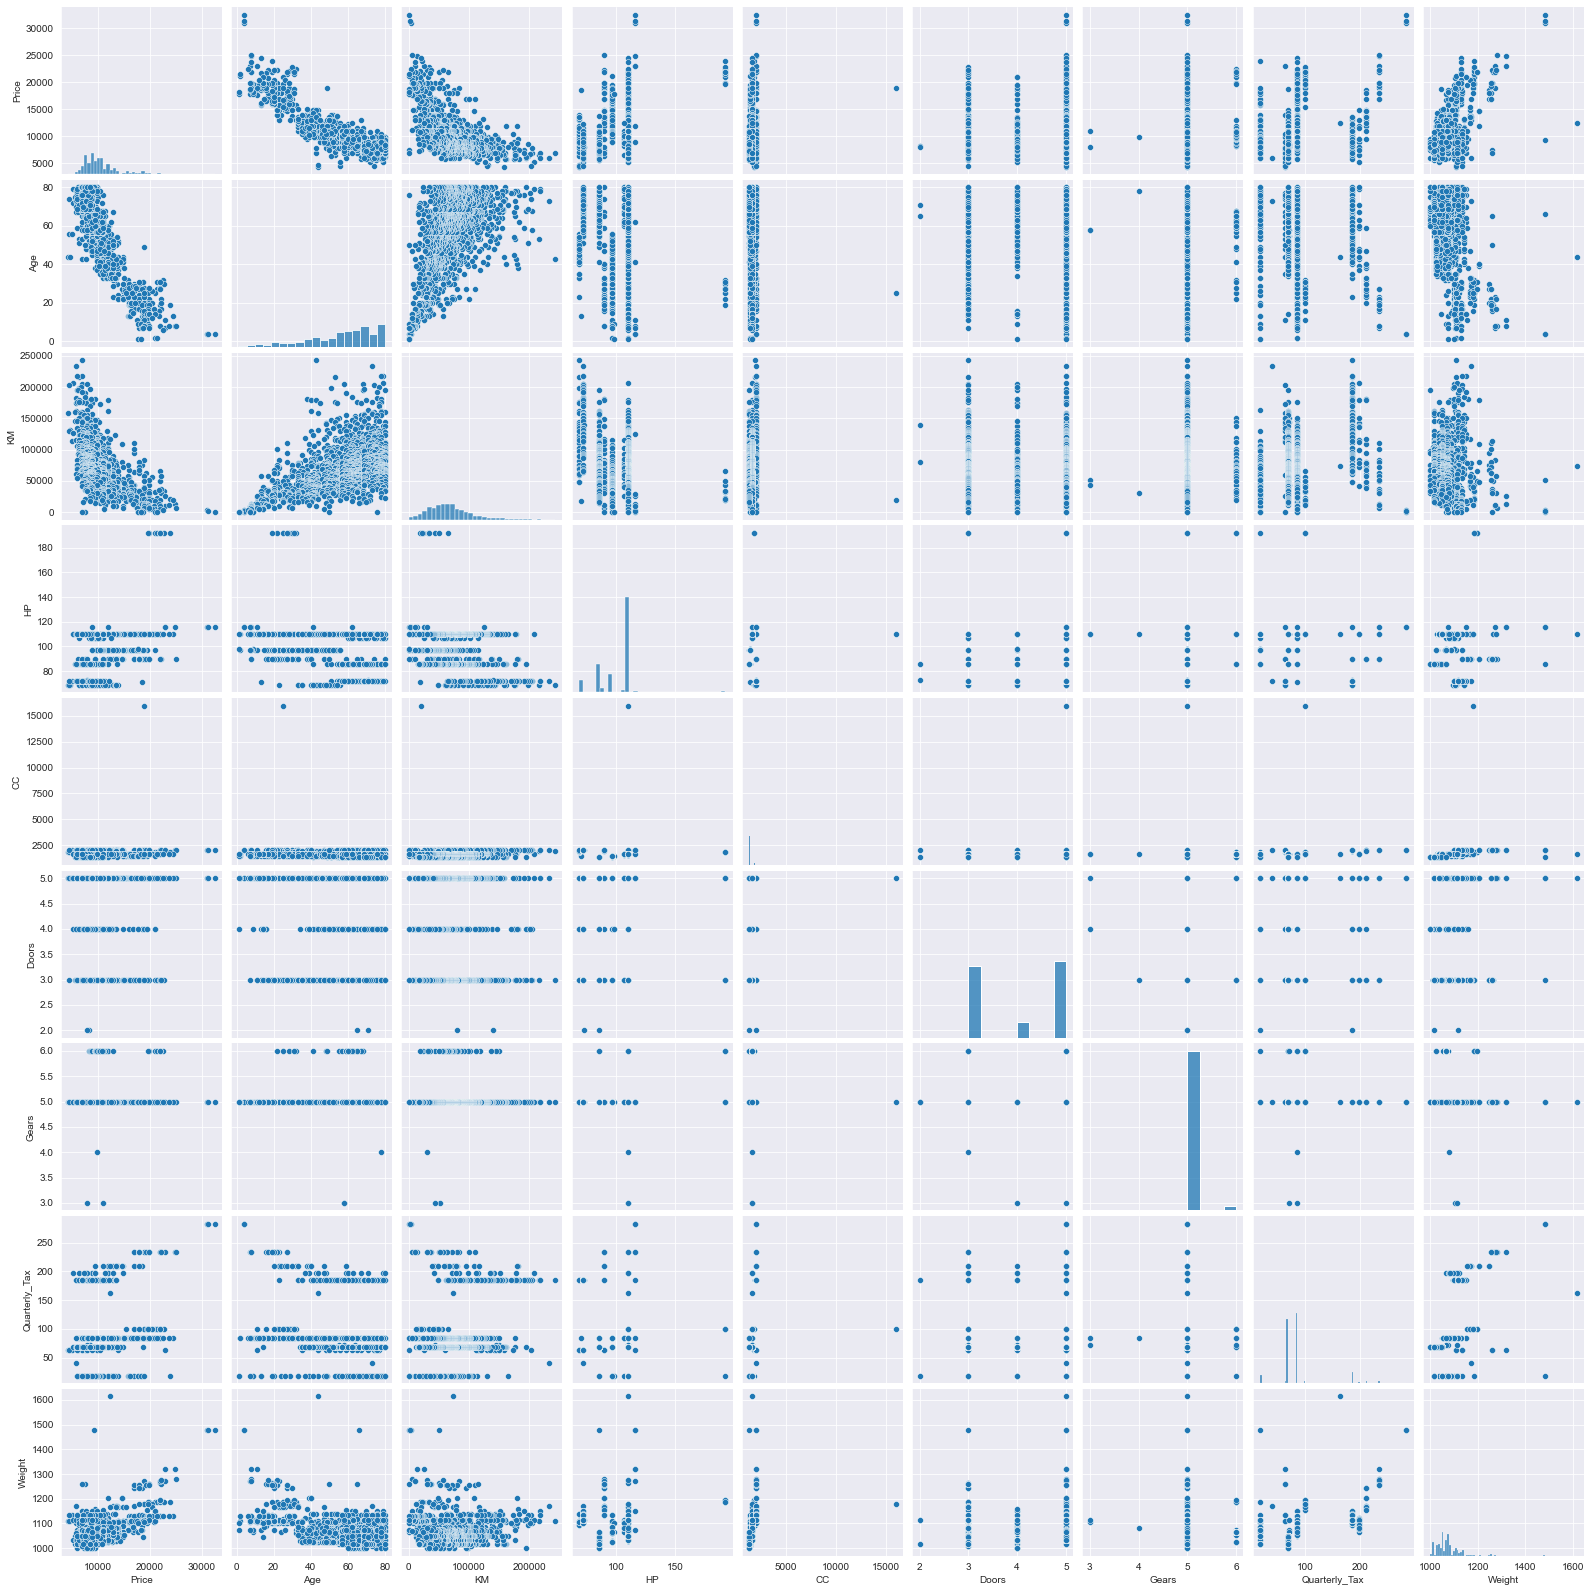

In [17]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars2)

# Model building

In [19]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=cars2).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:46:34   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
CC               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#Coefficients
model.params

Intercept       -5472.540368
Age              -121.713891
KM                 -0.020737
HP                 31.584612
CC                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [21]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.875273
Age             -46.551876
KM              -16.552424
HP               11.209719
CC               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age              1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
CC                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


In [22]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [24]:
#building on individual model
model_cc=smf.ols('Price~CC',data=cars2).fit()
model_cc.tvalues , model_cc.pvalues   #cc is significant

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [25]:
model_door=smf.ols('Price~Doors',data=cars2).fit()
model_door.tvalues , model_door.pvalues   #doors is significant

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [26]:
model_cd=smf.ols('Price~CC+Doors',data=cars2).fit()
model_cd.tvalues , model_cd.pvalues #both cc and doors are significant

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Model Validation

In [28]:
# Calculating VIF
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=cars2).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=cars2).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+Quarterly_Tax+Weight',data=cars2).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=cars2).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+Quarterly_Tax+Weight',data=cars2).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+Quarterly_Tax+Weight',data=cars2).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('Quarterly_Tax~Age+KM+HP+CC+Doors+Gears+Weight',data=cars2).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax',data=cars2).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Storing VIF values in a data frame
df = {'Variables':['Age','KM','HP','CC','Doors','Gears','Quarterly_Tax','Weight'],
      'VIF':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_frame = pd.DataFrame(df)  
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


In [29]:
# No Collinearity

In [76]:
# Residual Analysis
# Test for Normality of Residuals (Q-Q Plot)

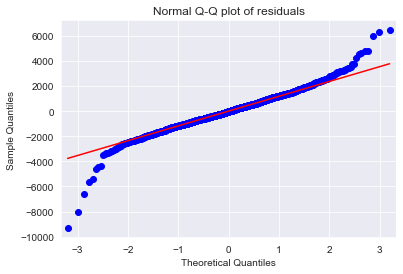

In [33]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [35]:
list(np.where(model.resid>6000)) #Outlier detection

[array([109, 146, 522], dtype=int64)]

In [36]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [37]:
## Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

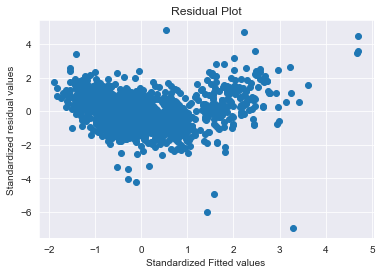

In [38]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

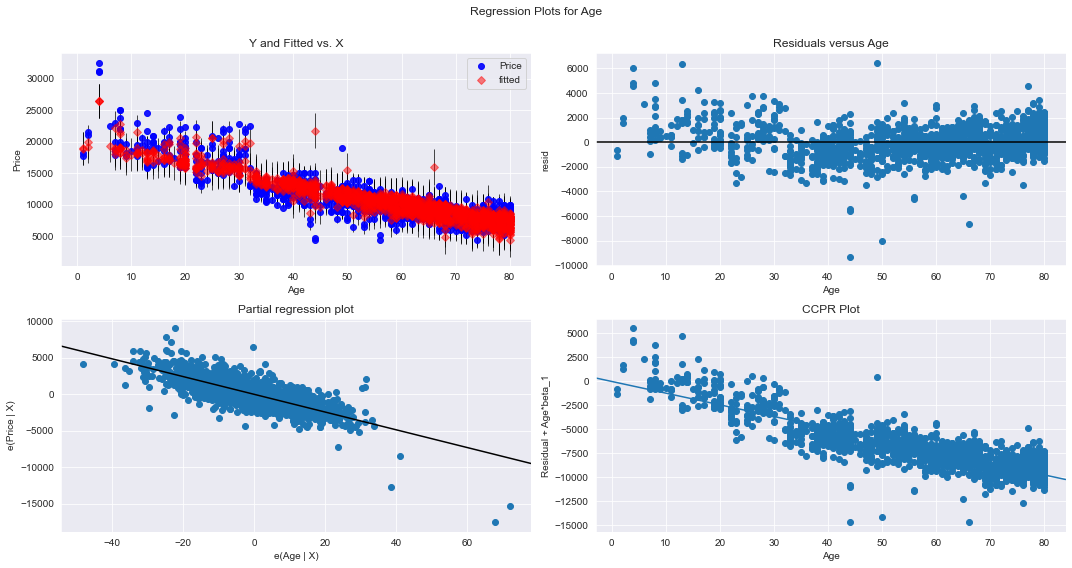

In [39]:
## Residual Vs Regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

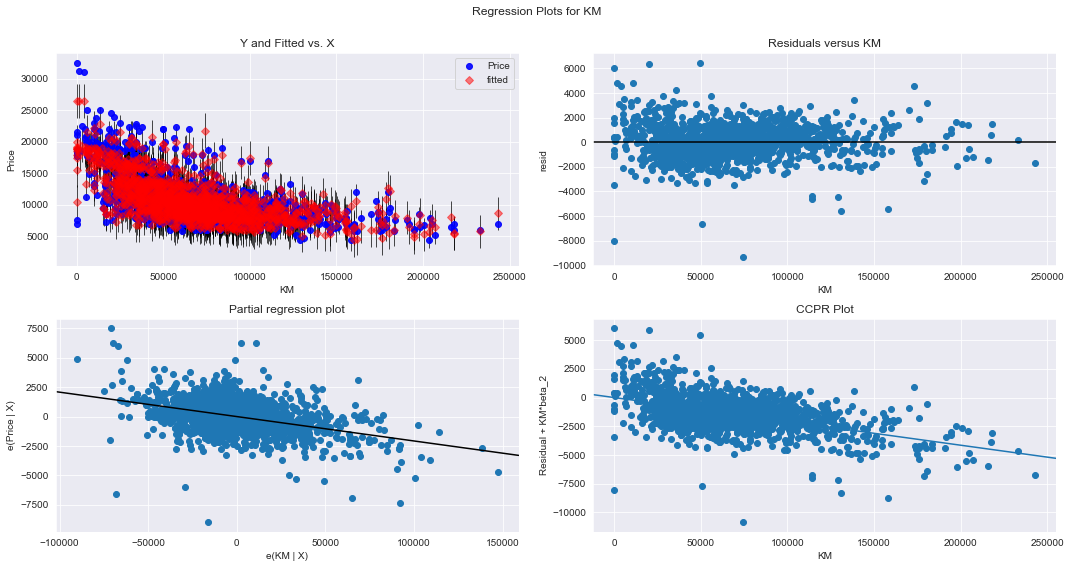

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

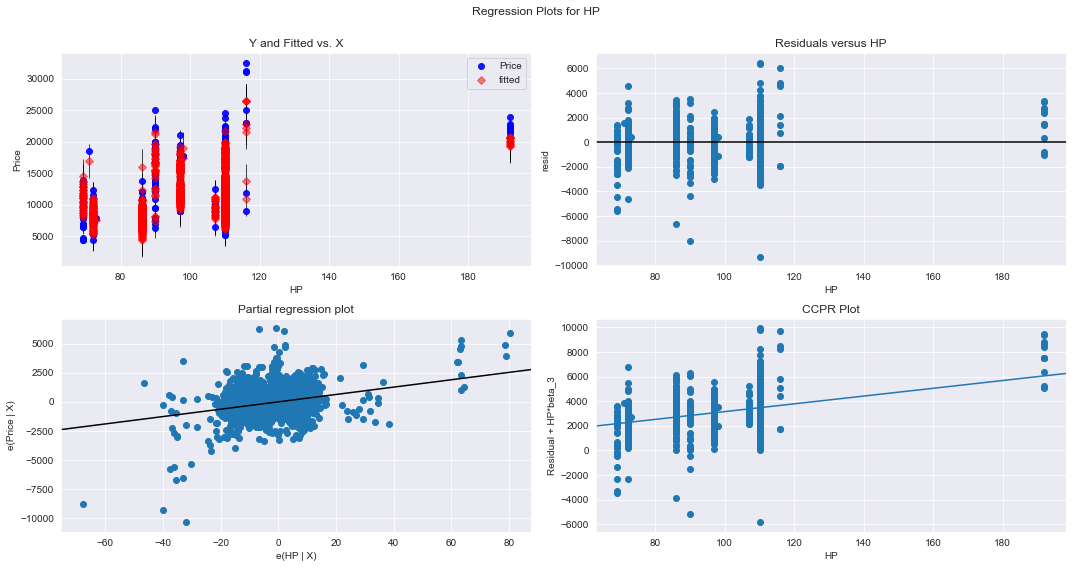

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

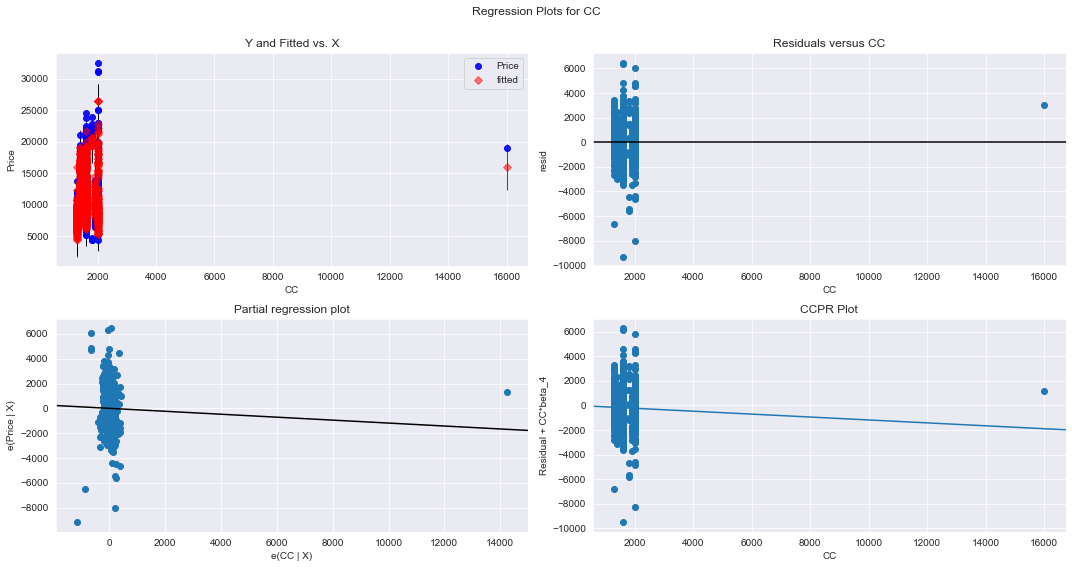

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

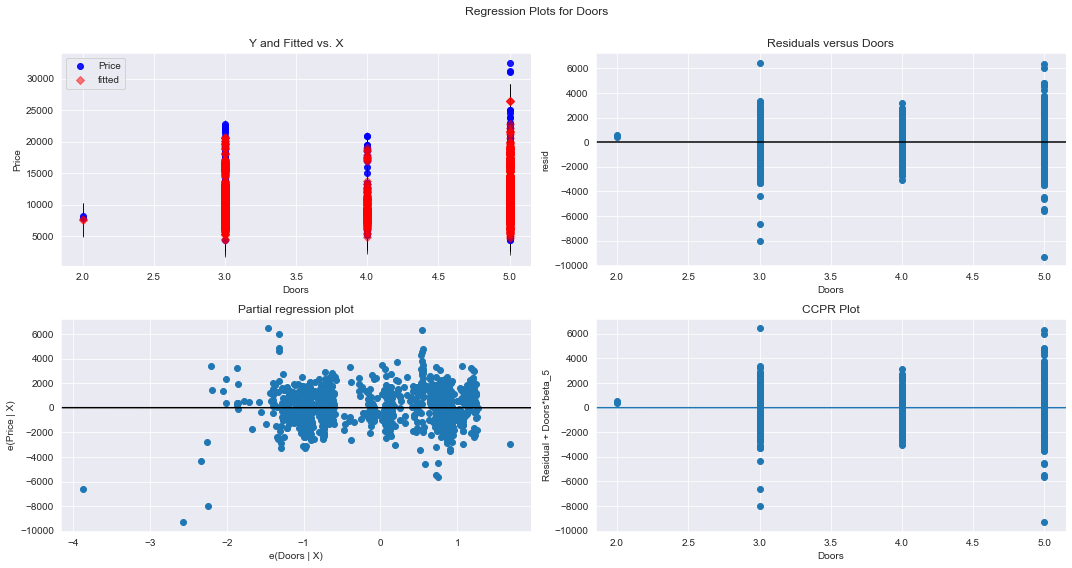

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

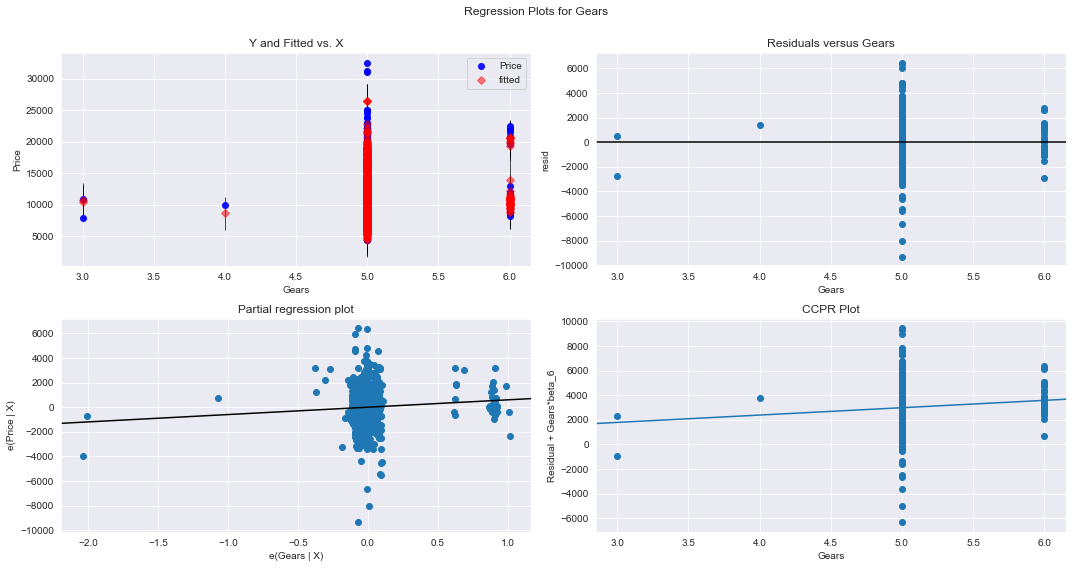

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

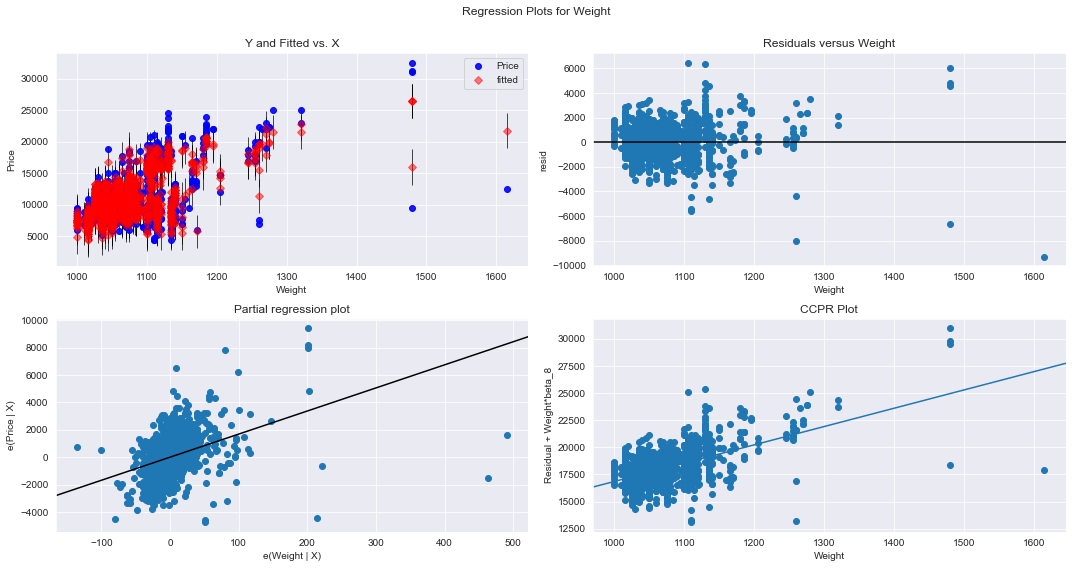

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

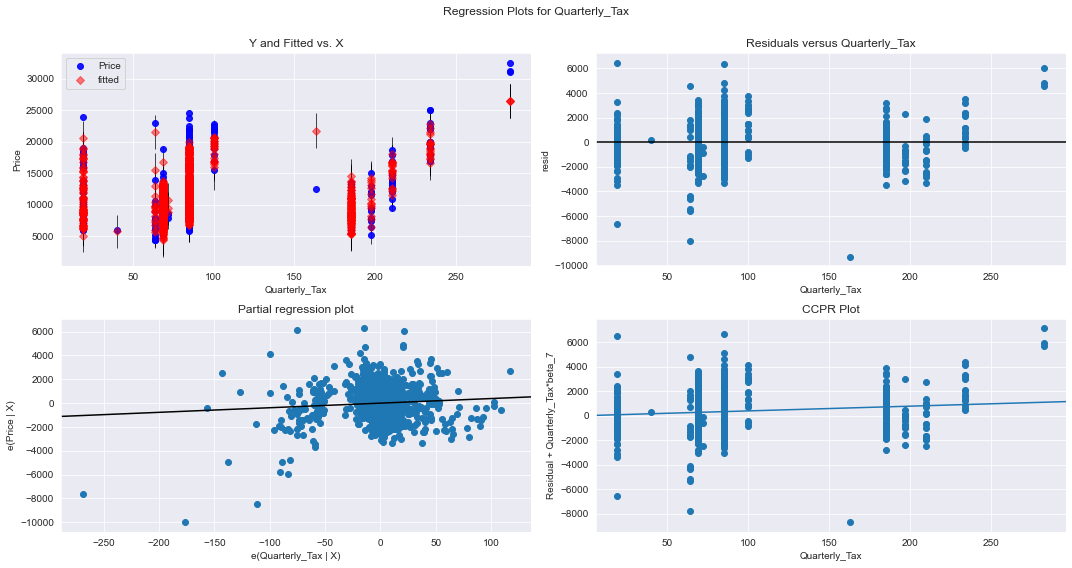

In [46]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

# Model Deletion Diagnostics

In [47]:
## Detecting Influencers/Outliers
## Cook’s Distance

In [48]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

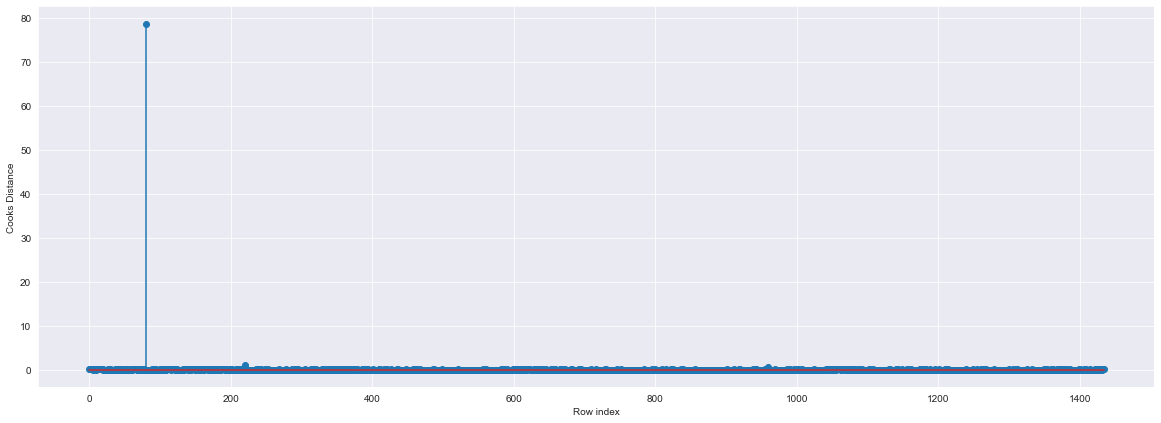

In [49]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582257265)

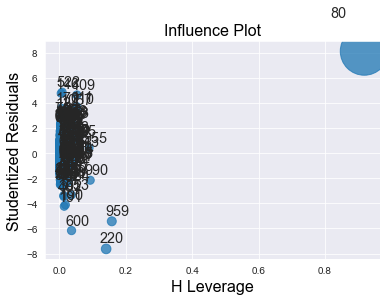

In [56]:
# High influence points 
influence_plot(model)
plt.show()

In [57]:
k = cars2.shape[1]
n = cars2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

In [55]:
# From the above plot, it is evident that data point 80 is the influencer

In [58]:
cars2[cars2.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the model

In [59]:
cars_new = pd.read_csv("C:\\Users\\shrey\\Downloads\\Assignment\\Multi Linear Regression\\ToyotaCorolla.csv")

In [60]:
#Discard the data points which are influencers and reasign the row number (reset_index())
cars3=cars_new.drop(cars_new.index[[80]],axis=0).reset_index()

In [61]:
cars3

,index,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,...,1,1,1,0,0,0,1,0,0,0
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,...,1,0,1,0,0,0,1,0,0,0
2,2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,...,1,1,1,0,1,1,1,0,0,0
1431,1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,...,0,0,1,0,0,1,1,0,0,0
1432,1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,...,0,0,1,0,0,0,1,0,0,0
1433,1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,...,0,0,0,0,0,0,1,0,0,0


In [64]:
cars3=cars.iloc[:,[2,3,6,8,12,13,15,16,17]]
cars3.rename(columns={"Age_08_04":"Age","cc":"CC"},inplace=True)
cars3

C:\Users\shrey\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Price,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [69]:
#Build the model on the new data
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=cars3).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        cars3=cars3.drop(cars3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        cars3
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=cars3).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8693790488655818
Thus model accuracy is improved to 0.8778445878599779
Thus model accuracy is improved to 0.8851845904421739
Thus model accuracy is improved to 0.8894191849749751
Thus model accuracy is improved to 0.8914204825569462
Thus model accuracy is improved to 0.8921467826162199
Thus model accuracy is improved to 0.8934037497368835
Thus model accuracy is improved to 0.8944954473640403
Thus model accuracy is improved to 0.8958333530393431
Thus model accuracy is improved to 0.8966334481080778
Thus model accuracy is improved to 0.8941835374074523
Thus model accuracy is improved to 0.8951069956497651
Thus model accuracy is improved to 0.8965514940097824
Thus model accuracy is improved to 0.8971531368893257
Thus model accuracy is improved to 0.8979680072945878
Thus model accuracy is improved to 0.8975421185310548
Thus model accuracy is improved to 0.8970095523065387
Thus model accuracy is improved to 0.8965434597967323
Thus model accuracy is impro

# Predicting for new data

In [73]:
new_data=pd.DataFrame({'Age':14,"KM":50000,"HP":60,"CC":1200,"Doors":4,"Gears":5,"Quarterly_Tax":75,"Weight":1711},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,14,50000,60,1200,4,5,75,1711


In [74]:
final_model.predict(new_data)

0    39874.954862
dtype: float64

In [75]:
pred_y=final_model.predict(cars3)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64